<a href="https://colab.research.google.com/github/momolefe24/FashionNeRF/blob/master/%20Neural_Radiance_Fields_Using_Pytorch3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
from skimage import io

# New Section

In [4]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
import os

In [6]:
!unzip gdrive/MyDrive/Dataset.zip

Archive:  gdrive/MyDrive/Dataset.zip
   creating: Dataset/
   creating: Dataset/dennis/
   creating: Dataset/dennis/test/
  inflating: Dataset/dennis/test/0.hdf5  
  inflating: Dataset/dennis/test/1.hdf5  
  inflating: Dataset/dennis/test/r_0.png  
  inflating: Dataset/dennis/test/r_0_depth_0000.png  
  inflating: Dataset/dennis/test/r_0_normal_0000.png  
  inflating: Dataset/dennis/test/r_1.png  
  inflating: Dataset/dennis/test/r_1_depth_0000.png  
  inflating: Dataset/dennis/test/r_1_normal_0000.png  
   creating: Dataset/dennis/train/
  inflating: Dataset/dennis/train/r_0.png  
  inflating: Dataset/dennis/train/r_1.png  
  inflating: Dataset/dennis/train/r_10.png  
  inflating: Dataset/dennis/train/r_100.png  
  inflating: Dataset/dennis/train/r_101.png  
  inflating: Dataset/dennis/train/r_102.png  
  inflating: Dataset/dennis/train/r_103.png  
  inflating: Dataset/dennis/train/r_104.png  
  inflating: Dataset/dennis/train/r_105.png  
  inflating: Dataset/dennis/train/r_106.png  


In [7]:
!unzip gdrive/MyDrive/FashionNeRF.zip

Archive:  gdrive/MyDrive/FashionNeRF.zip
   creating: FashionNeRF/
   creating: FashionNeRF/.ipynb_checkpoints/
  inflating: FashionNeRF/.ipynb_checkpoints/FashionNeRF-checkpoint.ipynb  
 extracting: FashionNeRF/.ipynb_checkpoints/FashionNeRF-checkpoint.py  
  inflating: FashionNeRF/.ipynb_checkpoints/generate_cow_renders-checkpoint.py  
  inflating: FashionNeRF/.ipynb_checkpoints/plot_image_grid-checkpoint.py  
  inflating: FashionNeRF/.ipynb_checkpoints/requirements-checkpoint.txt  
  inflating: FashionNeRF/.ipynb_checkpoints/setup-checkpoint.py  
  inflating: FashionNeRF/.ipynb_checkpoints/Untitled-checkpoint.ipynb  
  inflating: FashionNeRF/.ipynb_checkpoints/Untitled1-checkpoint.ipynb  
  inflating: FashionNeRF/.ipynb_checkpoints/Untitled2-checkpoint.ipynb  
   creating: FashionNeRF/.vscode/
  inflating: FashionNeRF/.vscode/launch.json  
  inflating: FashionNeRF/.vscode/settings.json  
 extracting: FashionNeRF/1.10.0.tar.gz  
   creating: FashionNeRF/build/
   creating: FashionNeR

In [8]:
!unzip gdrive/MyDrive/images.zip

Archive:  gdrive/MyDrive/images.zip
  inflating: mask/r_0_depth_0000.png  
  inflating: mask/r_1_depth_0000.png  
  inflating: mask/r_10_depth_0000.png  
  inflating: mask/r_11_depth_0000.png  
  inflating: mask/r_12_depth_0000.png  
  inflating: mask/r_13_depth_0000.png  
  inflating: mask/r_14_depth_0000.png  
  inflating: mask/r_15_depth_0000.png  
  inflating: mask/r_16_depth_0000.png  
  inflating: mask/r_17_depth_0000.png  
  inflating: mask/r_18_depth_0000.png  
  inflating: mask/r_19_depth_0000.png  
  inflating: mask/r_2_depth_0000.png  
  inflating: mask/r_3_depth_0000.png  
  inflating: mask/r_4_depth_0000.png  
  inflating: mask/r_5_depth_0000.png  
  inflating: mask/r_6_depth_0000.png  
  inflating: mask/r_7_depth_0000.png  
  inflating: mask/r_8_depth_0000.png  
  inflating: mask/r_9_depth_0000.png  
  inflating: train/r_0.png           
  inflating: train/r_1.png           
  inflating: train/r_10.png          
  inflating: train/r_11.png          
  inflating: train/r_1

In [ ]:
import json
import os
import numpy as np

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
f = open("transforms_train.json")
transform_trains = json.load(f)

FileNotFoundError: ignored

In [ ]:
# path = os.path.join(os.getcwd(), "dennis4/train")
# path

In [ ]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from skimage import util 

In [ ]:
d = {}
t = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(128),
    transforms.ToTensor()
])

In [ ]:
fov_x=  np.arctan2(transform_trains['w']/2, transform_trains['fl_x']) * 2 * 180 / np.pi
fov_y=  np.arctan2(transform_trains['h']/2, transform_trains['fl_y']) * 2 * 180 / np.pi
aspect_ratio = (np.tan(fov_x)/2)/(np.tan(fov_y)/2)
images = []
masks = []
R = []
T = []
for file in transform_trains['frames']:
  filename = file['file_path'].split("/")[-1]
  train_pathname = f"train/{filename}"
  mask_pathname = f"mask/{filename.split('.')[0]}_depth_0000.png"
  img = io.imread(train_pathname)
  mask = io.imread(mask_pathname)[:,:,0]
  mask = util.invert(mask)
  plt.imshow(mask)
  img = t(img).permute(1,2,0)[:,:,:3]
  mask = t(mask).permute(1,2,0)[:,:,0]
  images.append(img)
  masks.append(mask)
  rotation_matrix = torch.tensor(file['transform_matrix'])[:3,:3]
  translation_vector = torch.tensor(file['transform_matrix'])[:-1,-1]
  R.append(rotation_matrix)
  T.append(translation_vector)
  x = filename.split(".")[0]
  d[x] = {}
  d[x]['R'] = rotation_matrix
  d[x]['T'] = translation_vector 

FileNotFoundError: ignored

In [ ]:
images = torch.stack(images)
masks = torch.stack(masks)
R = torch.stack(R)
T = torch.stack(T)

In [ ]:
R.shape,T.shape

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt

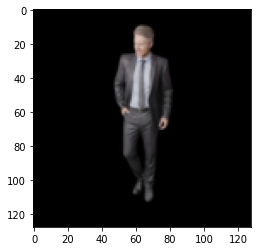

In [ ]:
plt.imshow(images[1].numpy())

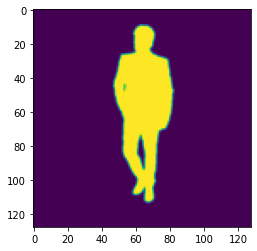

In [ ]:
plt.imshow(masks[1].numpy())

In [ ]:
%cd FashionNeRF/

/content/FashionNeRF


In [ ]:
!ls

1.10.0.tar.gz	   generate_cow_renders.py  results	     Untitled2.ipynb
build		   img			    runs	     Untitled.ipynb
cub-1.10.0	   plot_image_grid.py	    setup.py	     wandb
FashionNeRF.ipynb  __pycache__		    src
FashionNeRF.py	   requirements.txt	    Untitled1.ipynb


In [ ]:
%pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/FashionNeRF
  Running setup.py develop for FashionNeRF


In [ ]:
# !python3 setup.py install

In [ ]:
from src import *

In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
# !nvidia-smi

In [ ]:
from src.config import *

config:  /content/FashionNeRF


ModuleNotFoundError: ignored

In [ ]:
from src.dataset.datasets import FashionDataset, FashionPipeline
from utils import *
from model import *
import torch
import matplotlib.pyplot as plts
from torch import optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader,ConcatDataset

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.12.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

In [ ]:
# %matplotlib inline
# %matplotlib notebook
import os
import sys
import time
import json
import glob
import torch
import math
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython import display
from tqdm.notebook import tqdm

# Data structures and functions for rendering
from pytorch3d.structures import Volumes
from pytorch3d.transforms import so3_exp_map
from pytorch3d.renderer import (
    FoVPerspectiveCameras, 
    NDCMultinomialRaysampler,
    MonteCarloRaysampler,
    EmissionAbsorptionRaymarcher,
    ImplicitRenderer,
    RayBundle,
    ray_bundle_to_ray_points,
)

# obtain the utilized device
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    print(
        'Please note that NeRF is a resource-demanding method.'
        + ' Running this notebook on CPU will be extremely slow.'
        + ' We recommend running the example on a GPU'
        + ' with at least 10 GB of memory.'
    )
    device = torch.device("cpu")

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
# !wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/plot_image_grid.py
# !wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/main/docs/tutorials/utils/generate_cow_renders.py


In [ ]:
from plot_image_grid import image_grid
from generate_cow_renders import generate_cow_renders

In [ ]:
target_cameras, target_images, target_silhouettes = generate_cow_renders(num_views=40, azimuth_range=180)
print(f'Generated {len(target_images)} images/silhouettes/cameras.')

Generated 40 images/silhouettes/cameras.


In [ ]:
target_images.shape,target_silhouettes.shape

(torch.Size([40, 128, 128, 3]), torch.Size([40, 128, 128]))

In [ ]:
images.shape

torch.Size([20, 128, 128, 3])

In [ ]:
target_cameras.R.shape

torch.Size([40, 3, 3])

In [ ]:
torch.tensor([fov_x] * 20)

tensor([52.8858, 52.8858, 52.8858, 52.8858, 52.8858, 52.8858, 52.8858, 52.8858,
        52.8858, 52.8858, 52.8858, 52.8858, 52.8858, 52.8858, 52.8858, 52.8858,
        52.8858, 52.8858, 52.8858, 52.8858], dtype=torch.float64)

In [ ]:
# target_cameras.__dict__

In [ ]:
target_cameras._N = 20
target_cameras.T = T
target_cameras.R = R
target_cameras.znear = torch.tensor([-500] * 20)
target_cameras.zfar = torch.tensor([500] * 20)
target_cameras.fov = torch.tensor([fov_y] * 20)
target_cameras.aspect_ratio = torch.tensor([aspect_ratio] * 20)

In [ ]:
target_images = images
target_silhouettes = masks

In [ ]:
 target_images.shape,target_silhouettes.shape

(torch.Size([20, 128, 128, 3]), torch.Size([20, 128, 128]))

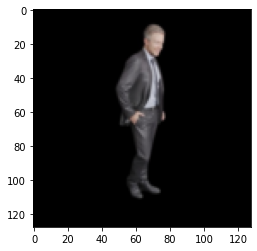

In [ ]:
plt.imshow(target_images[0].detach().cpu())

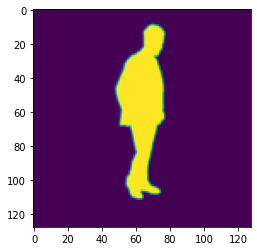

In [ ]:
plt.imshow(target_silhouettes[0].detach().cpu())

In [ ]:
# render_size describes the size of both sides of the 
# rendered images in pixels. Since an advantage of 
# Neural Radiance Fields are high quality renders
# with a significant amount of details, we render
# the implicit function at double the size of 
# target images.
render_size = target_images.shape[1] * 2

# Our rendered scene is centered around (0,0,0) 
# and is enclosed inside a bounding box
# whose side is roughly equal to 3.0 (world units).
volume_extent_world = 3.0

# 1) Instantiate the raysamplers.

# Here, NDCMultinomialRaysampler generates a rectangular image
# grid of rays whose coordinates follow the PyTorch3D
# coordinate conventions.
raysampler_grid = NDCMultinomialRaysampler(
    image_height=render_size,
    image_width=render_size,
    n_pts_per_ray=128,
    min_depth=0.1,
    max_depth=volume_extent_world,
)

# MonteCarloRaysampler generates a random subset 
# of `n_rays_per_image` rays emitted from the image plane.
raysampler_mc = MonteCarloRaysampler(
    min_x = -1.0,
    max_x = 1.0,
    min_y = -1.0,
    max_y = 1.0,
    n_rays_per_image=750,
    n_pts_per_ray=128,
    min_depth=0.1,
    max_depth=volume_extent_world,
)

# 2) Instantiate the raymarcher.
# Here, we use the standard EmissionAbsorptionRaymarcher 
# which marches along each ray in order to render
# the ray into a single 3D color vector 
# and an opacity scalar.
raymarcher = EmissionAbsorptionRaymarcher()

# Finally, instantiate the implicit renders
# for both raysamplers.
renderer_grid = ImplicitRenderer(
    raysampler=raysampler_grid, raymarcher=raymarcher,
)
renderer_mc = ImplicitRenderer(
    raysampler=raysampler_mc, raymarcher=raymarcher,
)

In [ ]:
class HarmonicEmbedding(torch.nn.Module):
    def __init__(self, n_harmonic_functions=60, omega0=0.1):
        """
        Given an input tensor `x` of shape [minibatch, ... , dim],
        the harmonic embedding layer converts each feature
        in `x` into a series of harmonic features `embedding`
        as follows:
            embedding[..., i*dim:(i+1)*dim] = [
                sin(x[..., i]),
                sin(2*x[..., i]),
                sin(4*x[..., i]),
                ...
                sin(2**(self.n_harmonic_functions-1) * x[..., i]),
                cos(x[..., i]),
                cos(2*x[..., i]),
                cos(4*x[..., i]),
                ...
                cos(2**(self.n_harmonic_functions-1) * x[..., i])
            ]
            
        Note that `x` is also premultiplied by `omega0` before
        evaluating the harmonic functions.
        """
        super().__init__()
        self.register_buffer(
            'frequencies',
            omega0 * (2.0 ** torch.arange(n_harmonic_functions)),
        )
    def forward(self, x):
        """
        Args:
            x: tensor of shape [..., dim]
        Returns:
            embedding: a harmonic embedding of `x`
                of shape [..., n_harmonic_functions * dim * 2]
        """
        embed = (x[..., None] * self.frequencies).view(*x.shape[:-1], -1)
        return torch.cat((embed.sin(), embed.cos()), dim=-1)


class NeuralRadianceField(torch.nn.Module):
    def __init__(self, n_harmonic_functions=60, n_hidden_neurons=256):
        super().__init__()
        """
        Args:
            n_harmonic_functions: The number of harmonic functions
                used to form the harmonic embedding of each point.
            n_hidden_neurons: The number of hidden units in the
                fully connected layers of the MLPs of the model.
        """
        
        # The harmonic embedding layer converts input 3D coordinates
        # to a representation that is more suitable for
        # processing with a deep neural network.
        self.harmonic_embedding = HarmonicEmbedding(n_harmonic_functions)
        
        # The dimension of the harmonic embedding.
        embedding_dim = n_harmonic_functions * 2 * 3
        
        # self.mlp is a simple 2-layer multi-layer perceptron
        # which converts the input per-point harmonic embeddings
        # to a latent representation.
        # Not that we use Softplus activations instead of ReLU.
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(embedding_dim, n_hidden_neurons),
            torch.nn.Softplus(beta=10.0),
            torch.nn.Linear(n_hidden_neurons, n_hidden_neurons),
            torch.nn.Softplus(beta=10.0),
        )        
        
        # Given features predicted by self.mlp, self.color_layer
        # is responsible for predicting a 3-D per-point vector
        # that represents the RGB color of the point.
        self.color_layer = torch.nn.Sequential(
            torch.nn.Linear(n_hidden_neurons + embedding_dim, n_hidden_neurons),
            torch.nn.Softplus(beta=10.0),
            torch.nn.Linear(n_hidden_neurons, 3),
            torch.nn.Sigmoid(),
            # To ensure that the colors correctly range between [0-1],
            # the layer is terminated with a sigmoid layer.
        )  
        
        # The density layer converts the features of self.mlp
        # to a 1D density value representing the raw opacity
        # of each point.
        self.density_layer = torch.nn.Sequential(
            torch.nn.Linear(n_hidden_neurons, 1),
            torch.nn.Softplus(beta=10.0),
            # Sofplus activation ensures that the raw opacity
            # is a non-negative number.
        )
        
        # We set the bias of the density layer to -1.5
        # in order to initialize the opacities of the
        # ray points to values close to 0. 
        # This is a crucial detail for ensuring convergence
        # of the model.
        self.density_layer[0].bias.data[0] = -1.5        
                
    def _get_densities(self, features):
        """
        This function takes `features` predicted by `self.mlp`
        and converts them to `raw_densities` with `self.density_layer`.
        `raw_densities` are later mapped to [0-1] range with
        1 - inverse exponential of `raw_densities`.
        """
        raw_densities = self.density_layer(features)
        return 1 - (-raw_densities).exp()
    
    def _get_colors(self, features, rays_directions):
        """
        This function takes per-point `features` predicted by `self.mlp`
        and evaluates the color model in order to attach to each
        point a 3D vector of its RGB color.
        
        In order to represent viewpoint dependent effects,
        before evaluating `self.color_layer`, `NeuralRadianceField`
        concatenates to the `features` a harmonic embedding
        of `ray_directions`, which are per-point directions 
        of point rays expressed as 3D l2-normalized vectors
        in world coordinates.
        """
        spatial_size = features.shape[:-1]
        
        # Normalize the ray_directions to unit l2 norm.
        rays_directions_normed = torch.nn.functional.normalize(
            rays_directions, dim=-1
        )
        
        # Obtain the harmonic embedding of the normalized ray directions.
        rays_embedding = self.harmonic_embedding(
            rays_directions_normed
        )
        
        # Expand the ray directions tensor so that its spatial size
        # is equal to the size of features.
        rays_embedding_expand = rays_embedding[..., None, :].expand(
            *spatial_size, rays_embedding.shape[-1]
        )
        
        # Concatenate ray direction embeddings with 
        # features and evaluate the color model.
        color_layer_input = torch.cat(
            (features, rays_embedding_expand),
            dim=-1
        )
        return self.color_layer(color_layer_input)
    
  
    def forward(
        self, 
        ray_bundle: RayBundle,
        **kwargs,
    ):
        """
        The forward function accepts the parametrizations of
        3D points sampled along projection rays. The forward
        pass is responsible for attaching a 3D vector
        and a 1D scalar representing the point's 
        RGB color and opacity respectively.
        
        Args:
            ray_bundle: A RayBundle object containing the following variables:
                origins: A tensor of shape `(minibatch, ..., 3)` denoting the
                    origins of the sampling rays in world coords.
                directions: A tensor of shape `(minibatch, ..., 3)`
                    containing the direction vectors of sampling rays in world coords.
                lengths: A tensor of shape `(minibatch, ..., num_points_per_ray)`
                    containing the lengths at which the rays are sampled.

        Returns:
            rays_densities: A tensor of shape `(minibatch, ..., num_points_per_ray, 1)`
                denoting the opacity of each ray point.
            rays_colors: A tensor of shape `(minibatch, ..., num_points_per_ray, 3)`
                denoting the color of each ray point.
        """
        # We first convert the ray parametrizations to world
        # coordinates with `ray_bundle_to_ray_points`.
        rays_points_world = ray_bundle_to_ray_points(ray_bundle)
        # rays_points_world.shape = [minibatch x ... x 3]
        
        # For each 3D world coordinate, we obtain its harmonic embedding.
        embeds = self.harmonic_embedding(
            rays_points_world
        )
        # embeds.shape = [minibatch x ... x self.n_harmonic_functions*6]
        
        # self.mlp maps each harmonic embedding to a latent feature space.
        features = self.mlp(embeds)
        # features.shape = [minibatch x ... x n_hidden_neurons]
        
        # Finally, given the per-point features, 
        # execute the density and color branches.
        
        rays_densities = self._get_densities(features)
        # rays_densities.shape = [minibatch x ... x 1]

        rays_colors = self._get_colors(features, ray_bundle.directions)
        # rays_colors.shape = [minibatch x ... x 3]
        
        return rays_densities, rays_colors
    
    def batched_forward(
        self, 
        ray_bundle: RayBundle,
        n_batches: int = 16,
        **kwargs,        
    ):
        """
        This function is used to allow for memory efficient processing
        of input rays. The input rays are first split to `n_batches`
        chunks and passed through the `self.forward` function one at a time
        in a for loop. Combined with disabling PyTorch gradient caching
        (`torch.no_grad()`), this allows for rendering large batches
        of rays that do not all fit into GPU memory in a single forward pass.
        In our case, batched_forward is used to export a fully-sized render
        of the radiance field for visualization purposes.
        
        Args:
            ray_bundle: A RayBundle object containing the following variables:
                origins: A tensor of shape `(minibatch, ..., 3)` denoting the
                    origins of the sampling rays in world coords.
                directions: A tensor of shape `(minibatch, ..., 3)`
                    containing the direction vectors of sampling rays in world coords.
                lengths: A tensor of shape `(minibatch, ..., num_points_per_ray)`
                    containing the lengths at which the rays are sampled.
            n_batches: Specifies the number of batches the input rays are split into.
                The larger the number of batches, the smaller the memory footprint
                and the lower the processing speed.

        Returns:
            rays_densities: A tensor of shape `(minibatch, ..., num_points_per_ray, 1)`
                denoting the opacity of each ray point.
            rays_colors: A tensor of shape `(minibatch, ..., num_points_per_ray, 3)`
                denoting the color of each ray point.

        """

        # Parse out shapes needed for tensor reshaping in this function.
        n_pts_per_ray = ray_bundle.lengths.shape[-1]  
        spatial_size = [*ray_bundle.origins.shape[:-1], n_pts_per_ray]

        # Split the rays to `n_batches` batches.
        tot_samples = ray_bundle.origins.shape[:-1].numel()
        batches = torch.chunk(torch.arange(tot_samples), n_batches)

        # For each batch, execute the standard forward pass.
        batch_outputs = [
            self.forward(
                RayBundle(
                    origins=ray_bundle.origins.view(-1, 3)[batch_idx],
                    directions=ray_bundle.directions.view(-1, 3)[batch_idx],
                    lengths=ray_bundle.lengths.view(-1, n_pts_per_ray)[batch_idx],
                    xys=None,
                )
            ) for batch_idx in batches
        ]
        
        # Concatenate the per-batch rays_densities and rays_colors
        # and reshape according to the sizes of the inputs.
        rays_densities, rays_colors = [
            torch.cat(
                [batch_output[output_i] for batch_output in batch_outputs], dim=0
            ).view(*spatial_size, -1) for output_i in (0, 1)
        ]
        return rays_densities, rays_colors

In [ ]:
def huber(x, y, scaling=0.1):
    """
    A helper function for evaluating the smooth L1 (huber) loss
    between the rendered silhouettes and colors.
    """
    diff_sq = (x - y) ** 2
    loss = ((1 + diff_sq / (scaling**2)).clamp(1e-4).sqrt() - 1) * float(scaling)
    return loss

def sample_images_at_mc_locs(target_images, sampled_rays_xy):
    """
    Given a set of Monte Carlo pixel locations `sampled_rays_xy`,
    this method samples the tensor `target_images` at the
    respective 2D locations.
    
    This function is used in order to extract the colors from
    ground truth images that correspond to the colors
    rendered using `MonteCarloRaysampler`.
    """
    ba = target_images.shape[0]
    dim = target_images.shape[-1]
    spatial_size = sampled_rays_xy.shape[1:-1]
    # In order to sample target_images, we utilize
    # the grid_sample function which implements a
    # bilinear image sampler.
    # Note that we have to invert the sign of the 
    # sampled ray positions to convert the NDC xy locations
    # of the MonteCarloRaysampler to the coordinate
    # convention of grid_sample.
    images_sampled = torch.nn.functional.grid_sample(
        target_images.permute(0, 3, 1, 2), 
        -sampled_rays_xy.view(ba, -1, 1, 2),  # note the sign inversion
        align_corners=True
    )
    return images_sampled.permute(0, 2, 3, 1).view(
        ba, *spatial_size, dim
    )

def show_full_render(
    neural_radiance_field, camera,
    target_image, target_silhouette,
    loss_history_color, loss_history_sil,
):
    """
    This is a helper function for visualizing the
    intermediate results of the learning. 
    
    Since the `NeuralRadianceField` suffers from
    a large memory footprint, which does not let us
    render the full image grid in a single forward pass,
    we utilize the `NeuralRadianceField.batched_forward`
    function in combination with disabling the gradient caching.
    This chunks the set of emitted rays to batches and 
    evaluates the implicit function on one batch at a time
    to prevent GPU memory overflow.
    """
    
    # Prevent gradient caching.
    with torch.no_grad():
        # Render using the grid renderer and the
        # batched_forward function of neural_radiance_field.
        rendered_image_silhouette, _ = renderer_grid(
            cameras=camera, 
            volumetric_function=neural_radiance_field.batched_forward
        )
        # Split the rendering result to a silhouette render
        # and the image render.
        rendered_image, rendered_silhouette = (
            rendered_image_silhouette[0].split([3, 1], dim=-1)
        )
        
    # Generate plots.
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
    ax = ax.ravel()
    clamp_and_detach = lambda x: x.clamp(0.0, 1.0).cpu().detach().numpy()
    ax[0].plot(list(range(len(loss_history_color))), loss_history_color, linewidth=1)
    ax[1].imshow(clamp_and_detach(rendered_image))
    ax[2].imshow(clamp_and_detach(rendered_silhouette[..., 0]))
    ax[3].plot(list(range(len(loss_history_sil))), loss_history_sil, linewidth=1)
    ax[4].imshow(clamp_and_detach(target_image))
    ax[5].imshow(clamp_and_detach(target_silhouette))
    for ax_, title_ in zip(
        ax,
        (
            "loss color", "rendered image", "rendered silhouette",
            "loss silhouette", "target image",  "target silhouette",
        )
    ):
        if not title_.startswith('loss'):
            ax_.grid("off")
            ax_.axis("off")
        ax_.set_title(title_)
    fig.canvas.draw(); fig.show()
    display.clear_output(wait=True)
    display.display(fig)
    return fig

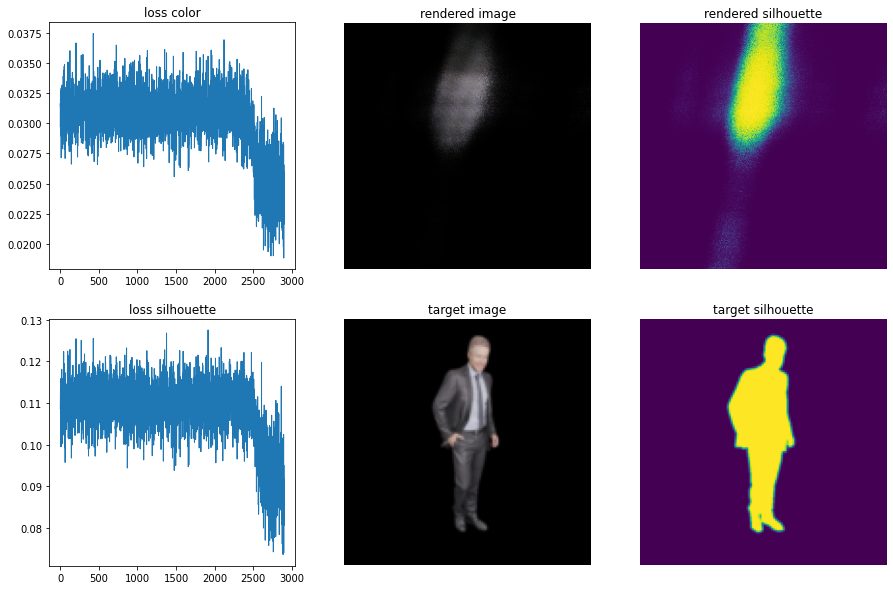

Iteration 02910: loss color = 3.19e-02 loss silhouette = 1.08e-01
Iteration 02920: loss color = 2.54e-02 loss silhouette = 8.74e-02
Iteration 02930: loss color = 2.72e-02 loss silhouette = 9.70e-02
Iteration 02940: loss color = 2.41e-02 loss silhouette = 8.42e-02
Iteration 02950: loss color = 2.33e-02 loss silhouette = 8.59e-02
Iteration 02960: loss color = 2.23e-02 loss silhouette = 8.68e-02
Iteration 02970: loss color = 2.64e-02 loss silhouette = 9.81e-02
Iteration 02980: loss color = 2.59e-02 loss silhouette = 9.61e-02
Iteration 02990: loss color = 2.71e-02 loss silhouette = 9.92e-02


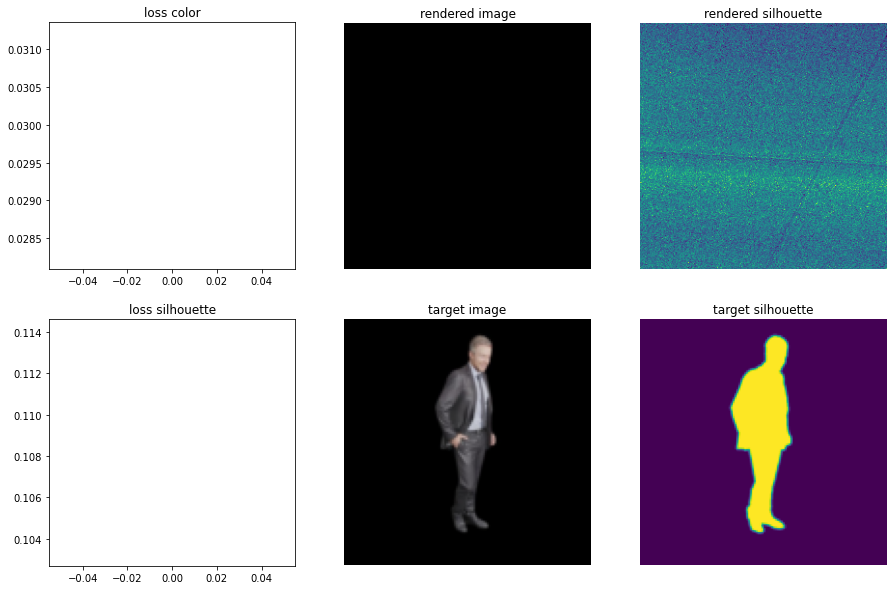

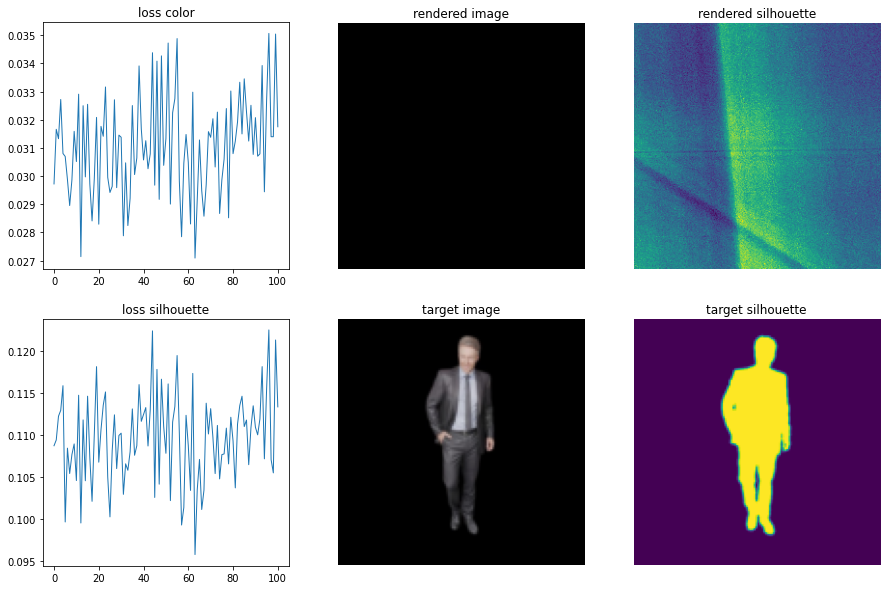

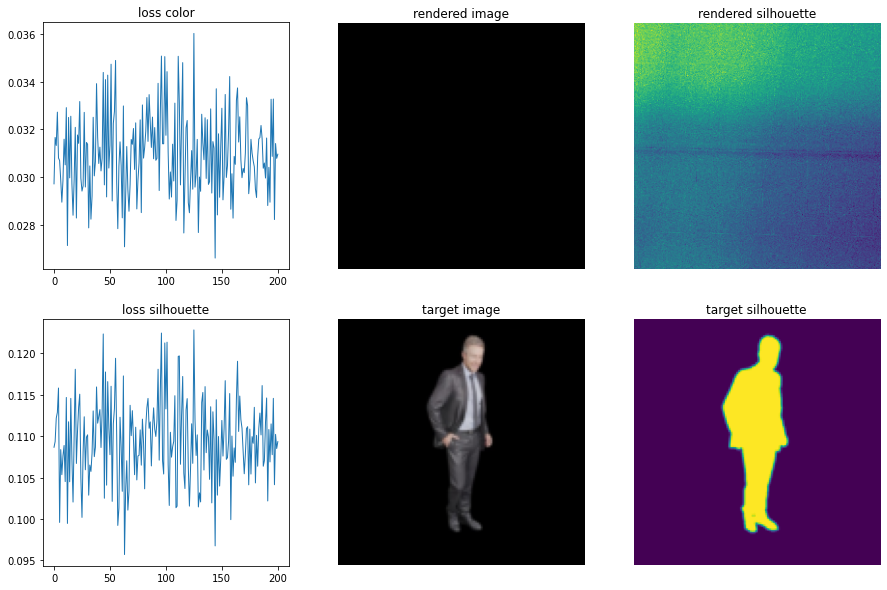

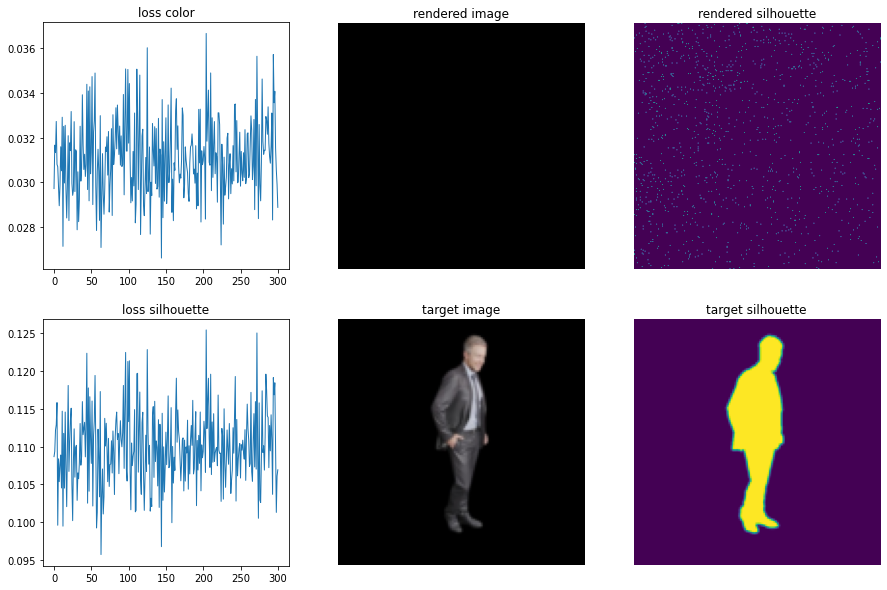

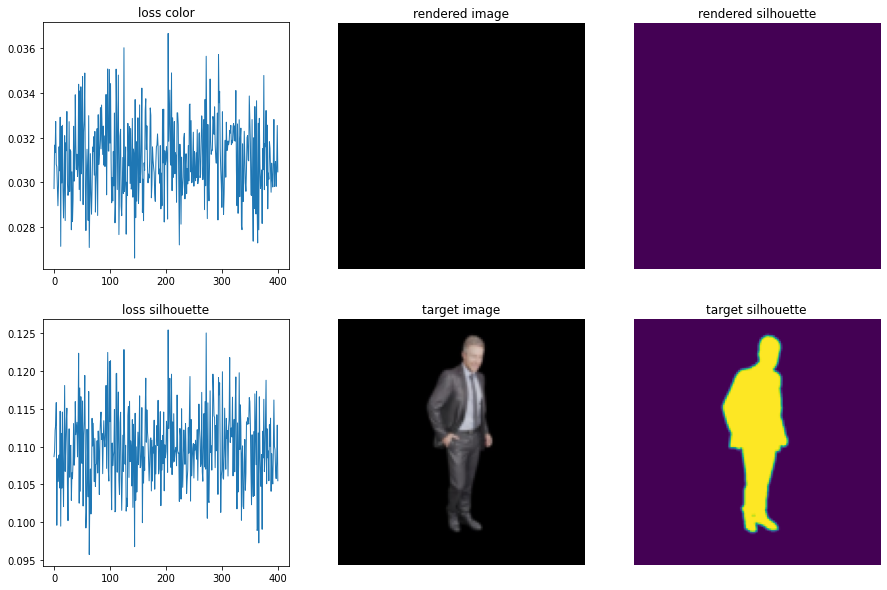

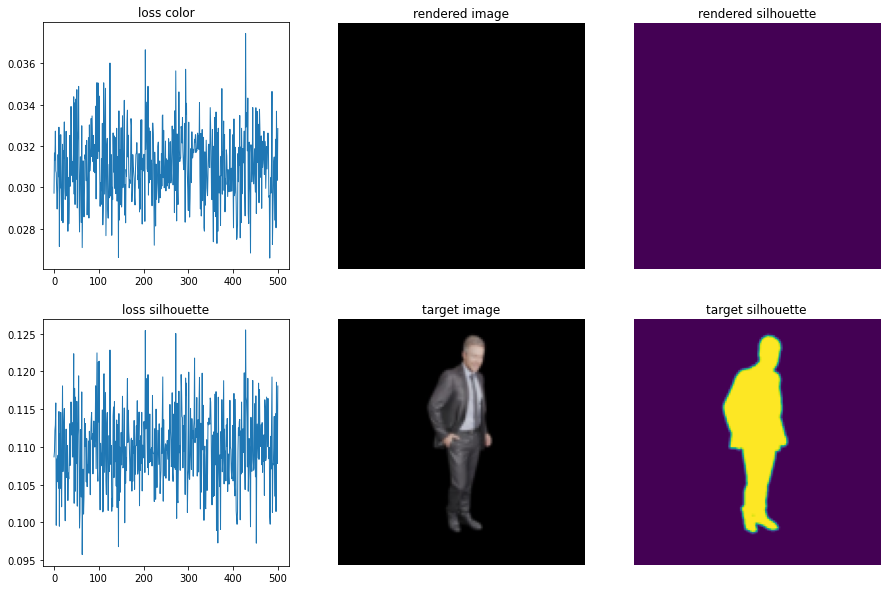

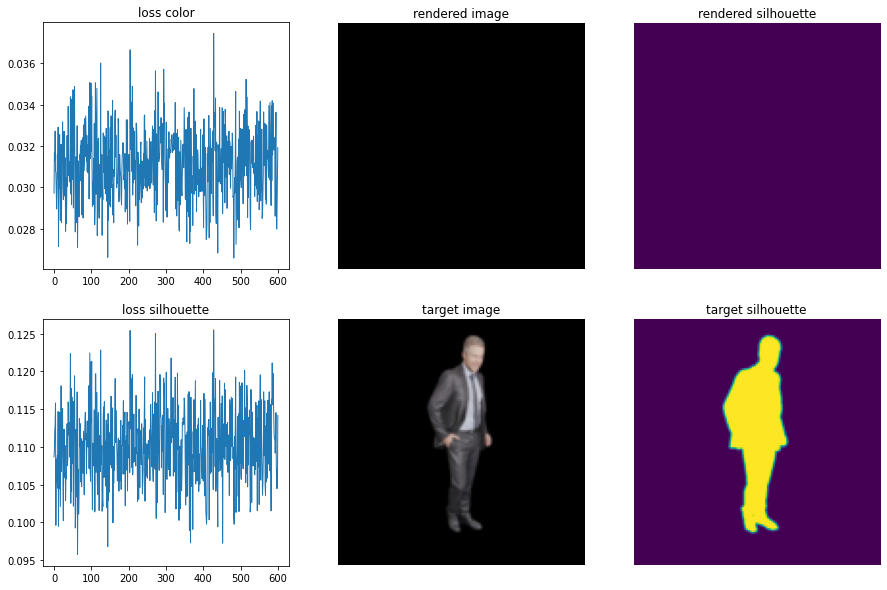

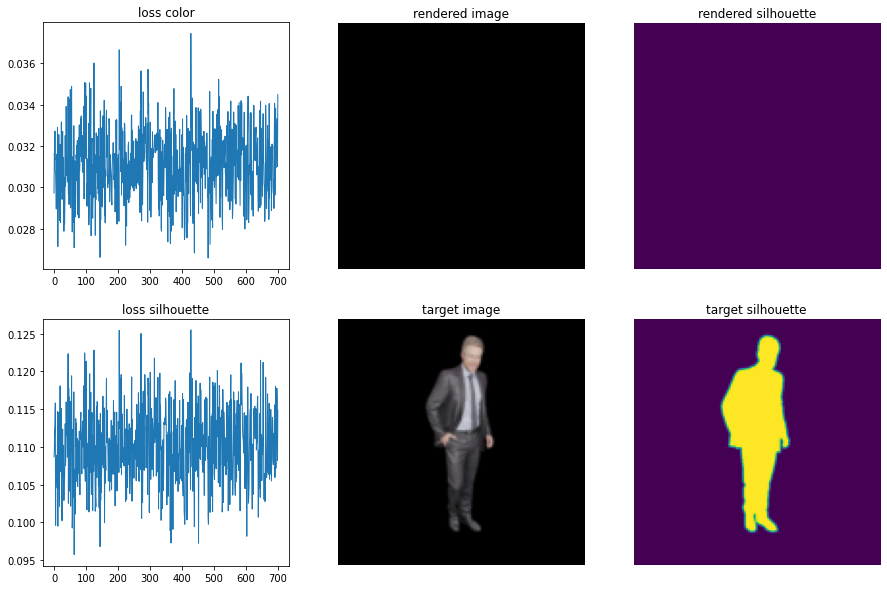

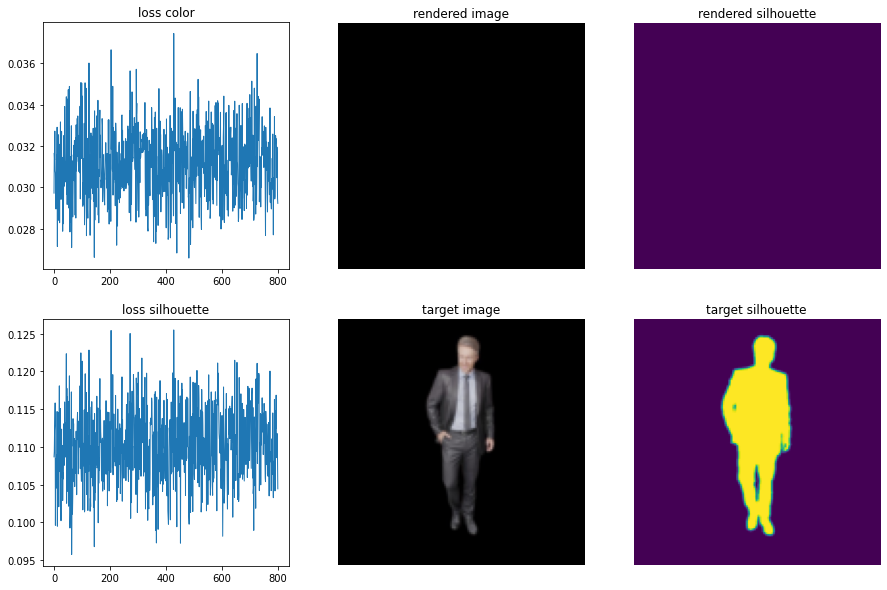

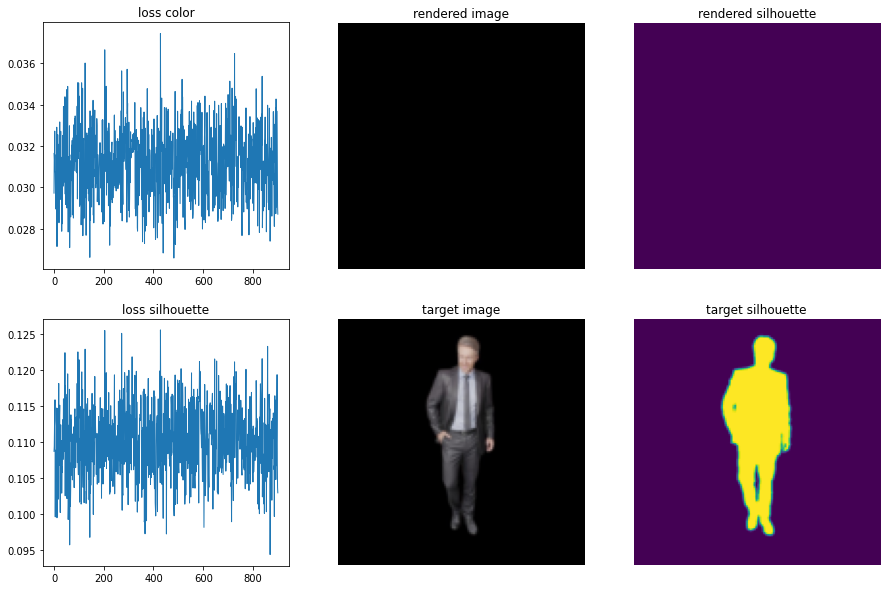

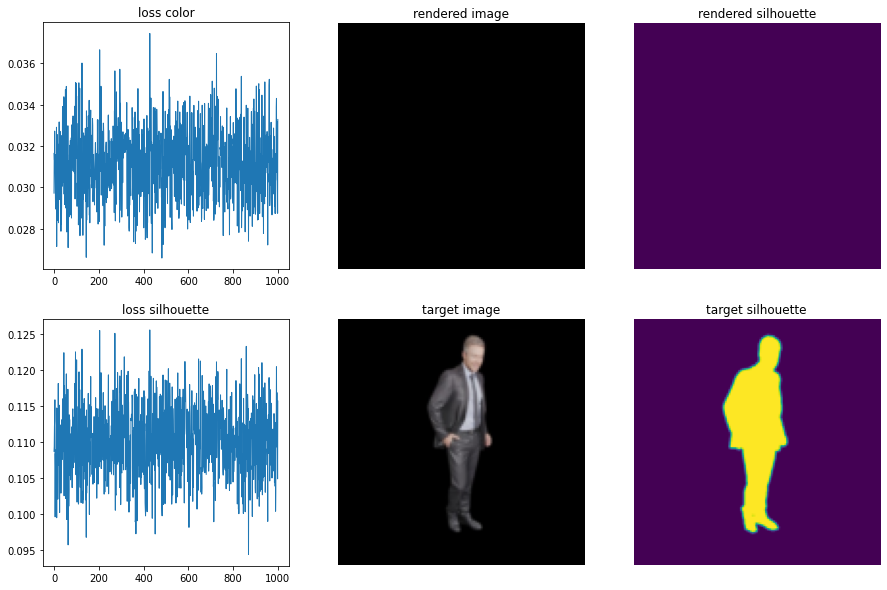

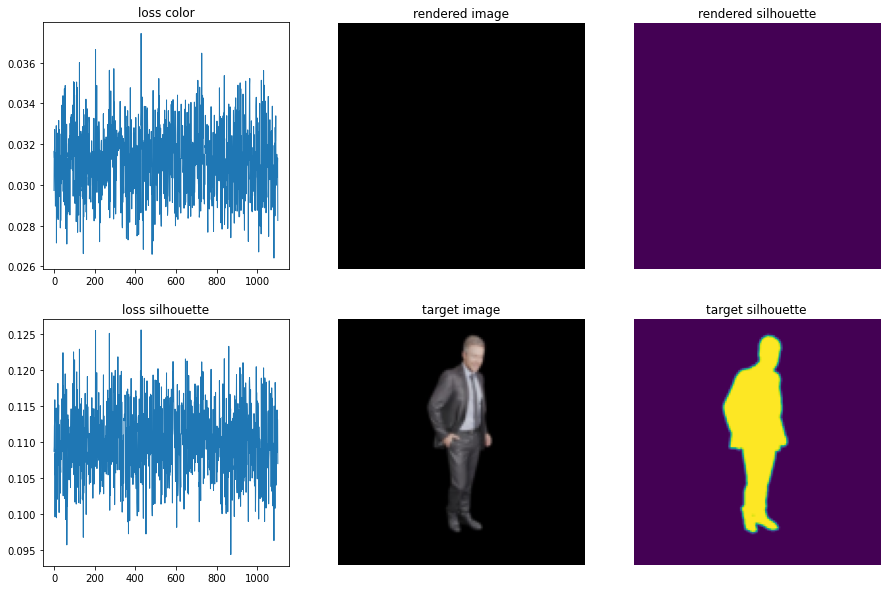

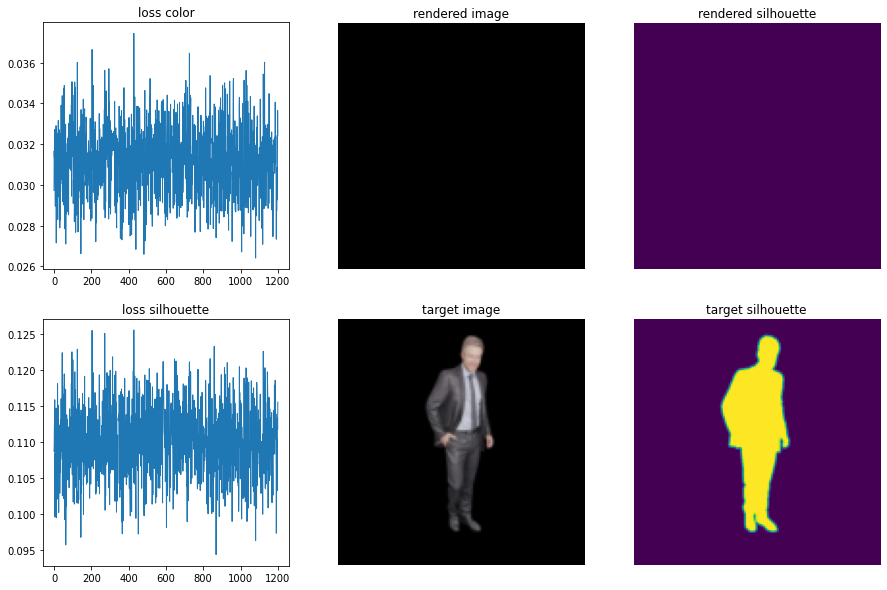

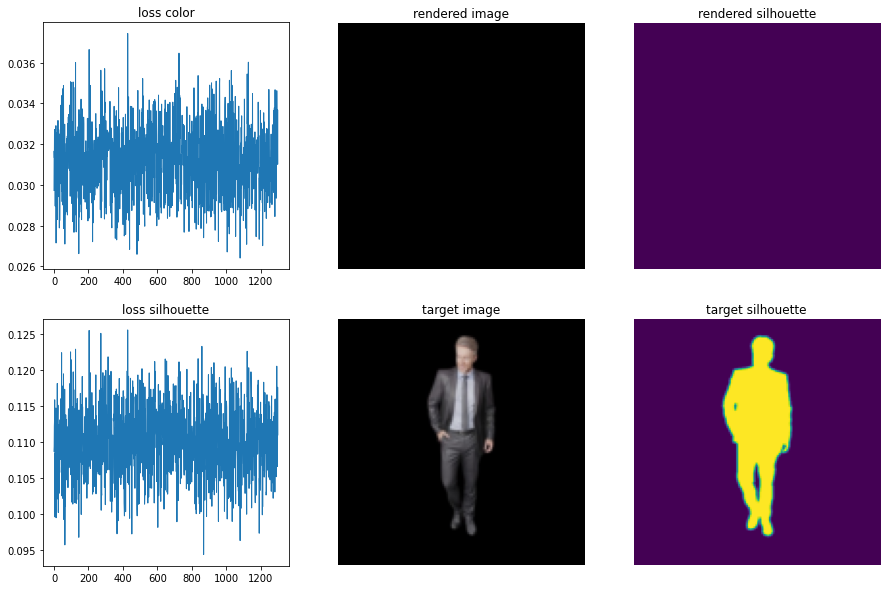

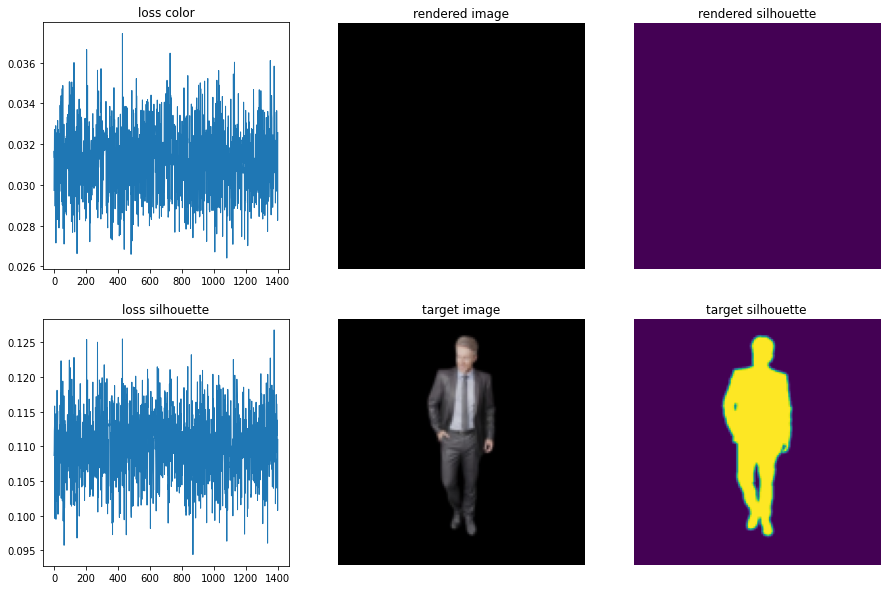

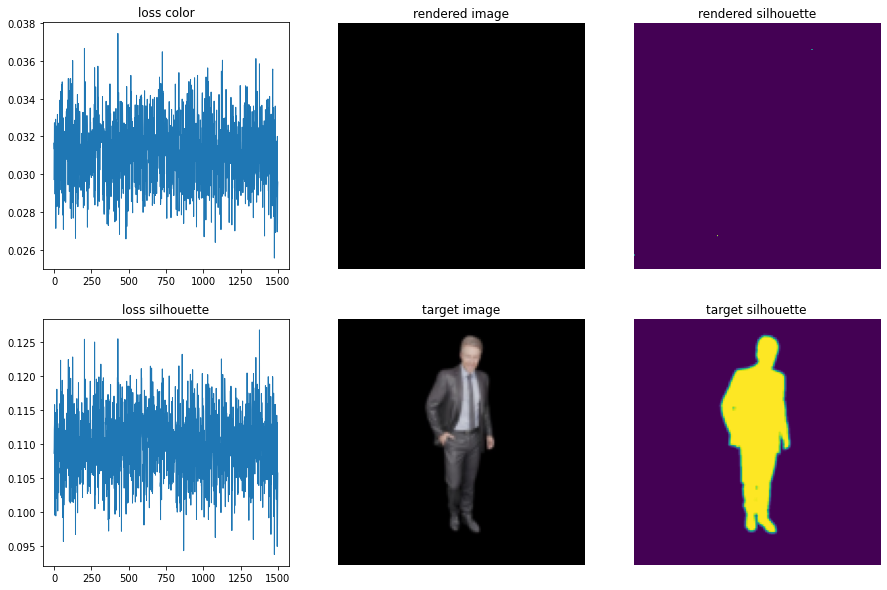

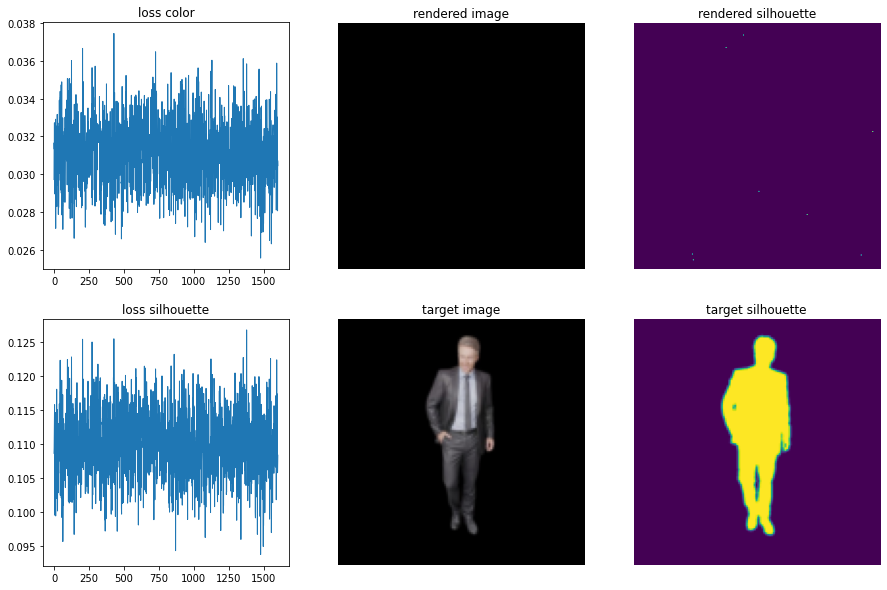

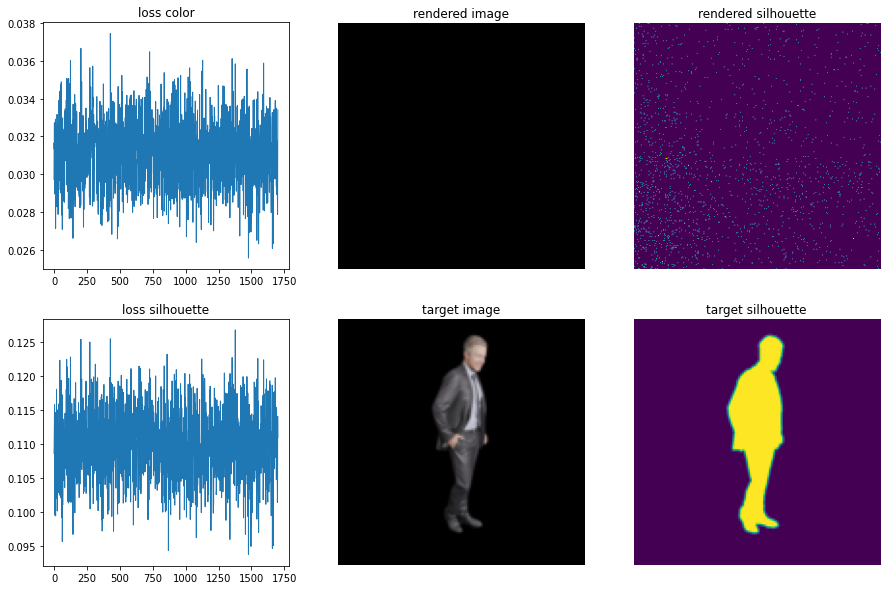

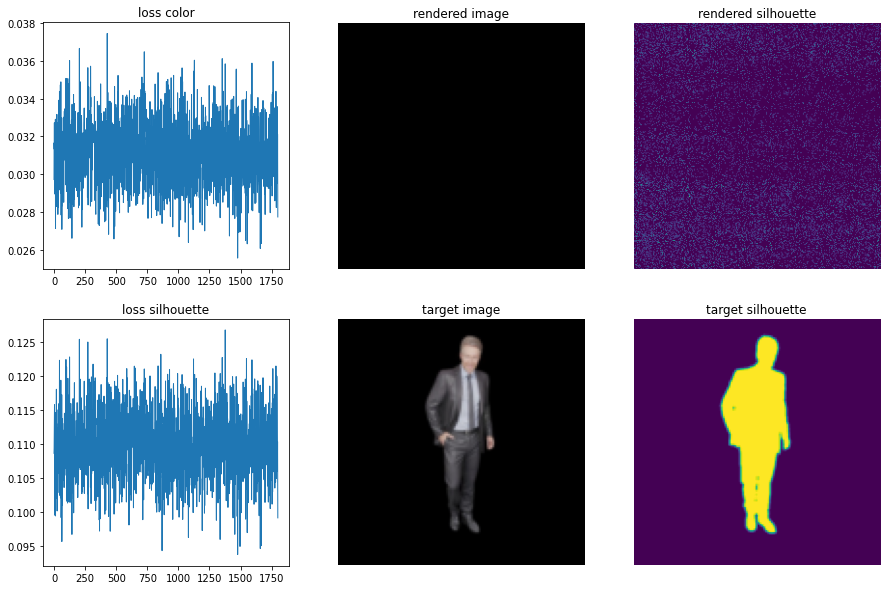

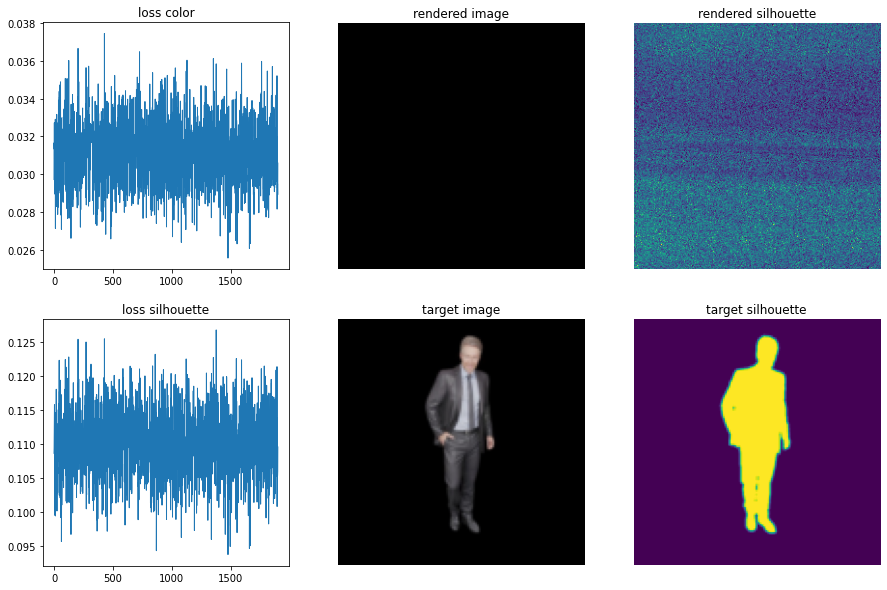

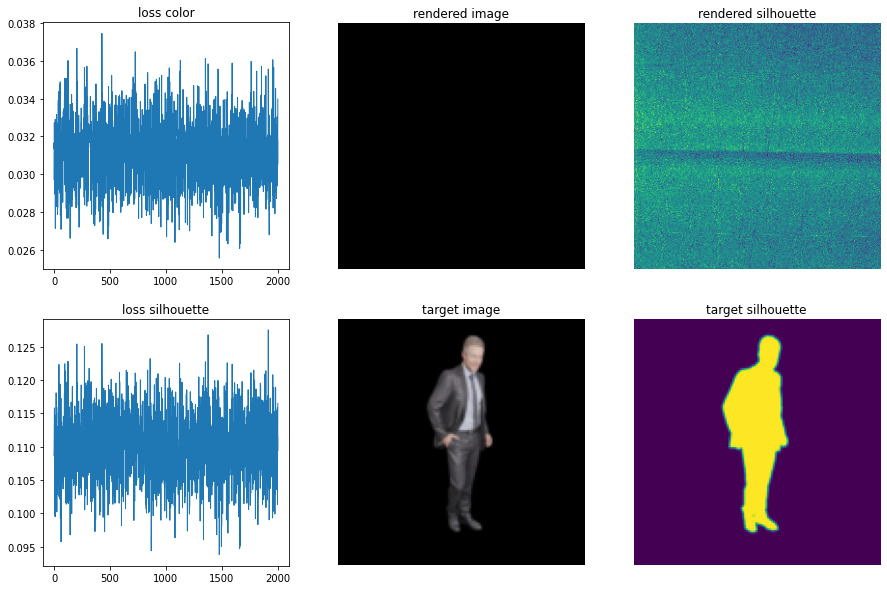

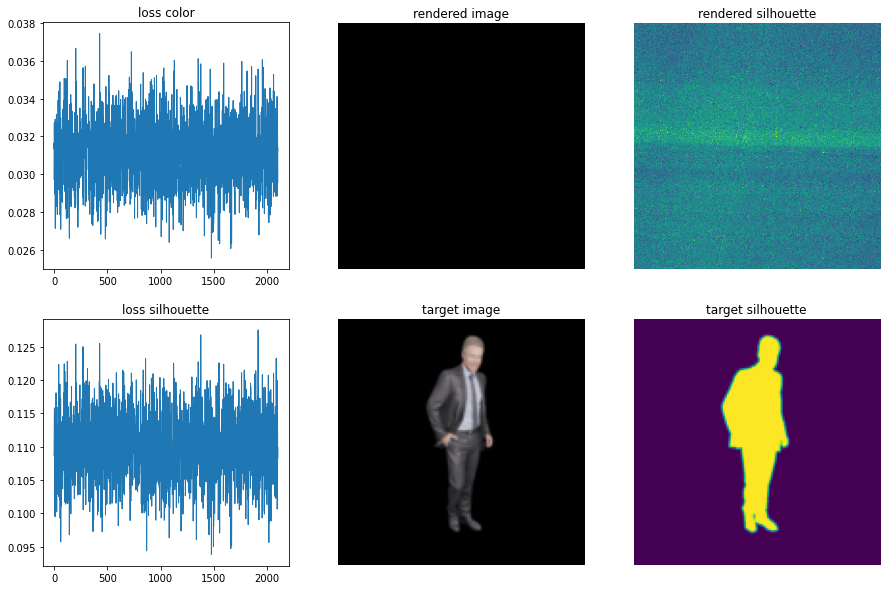

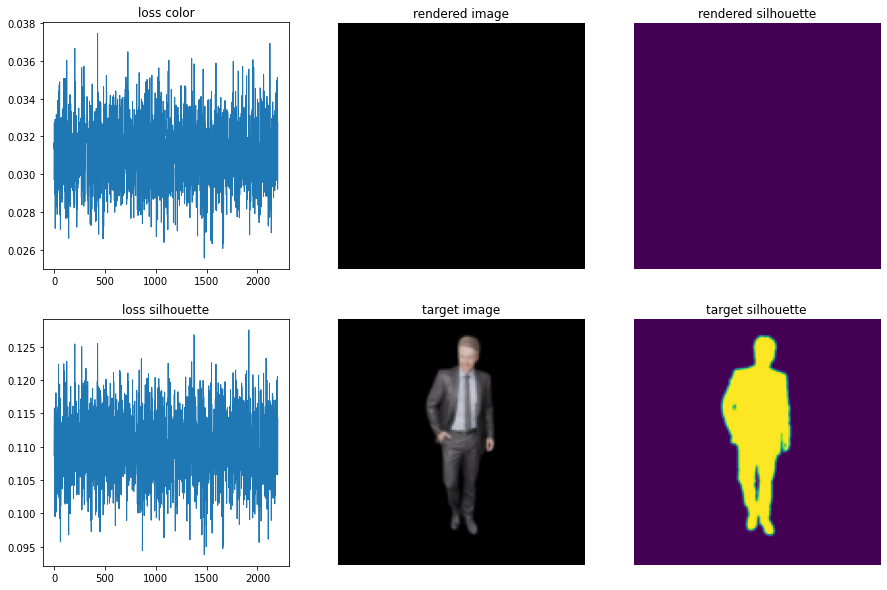

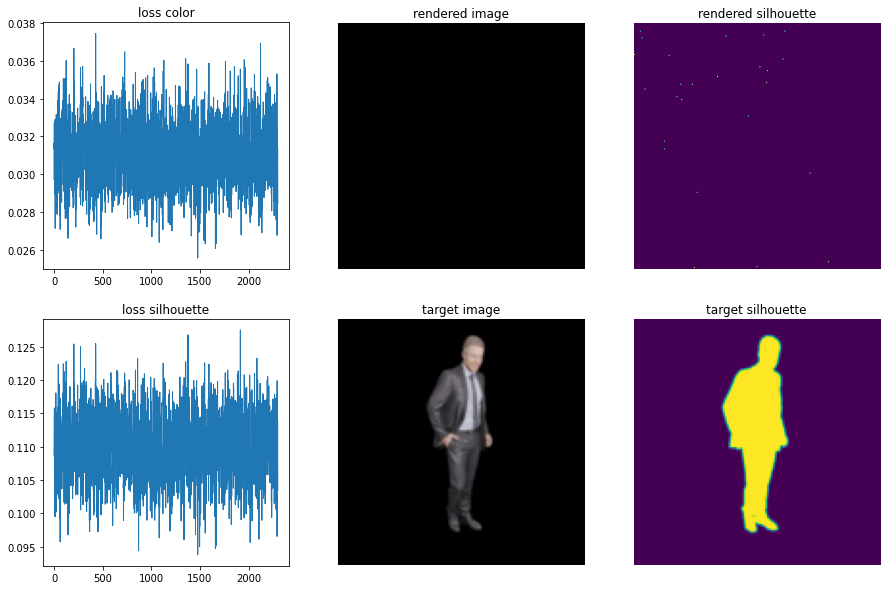

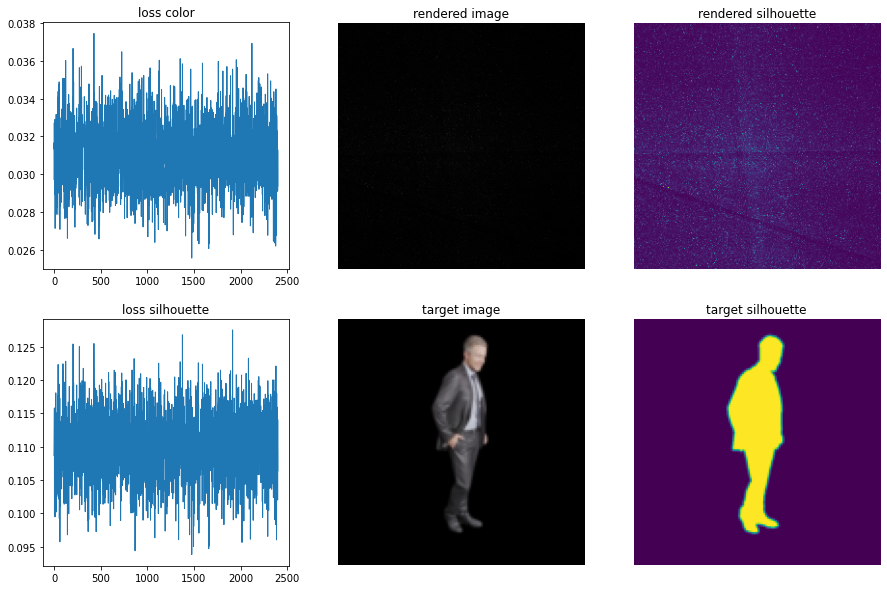

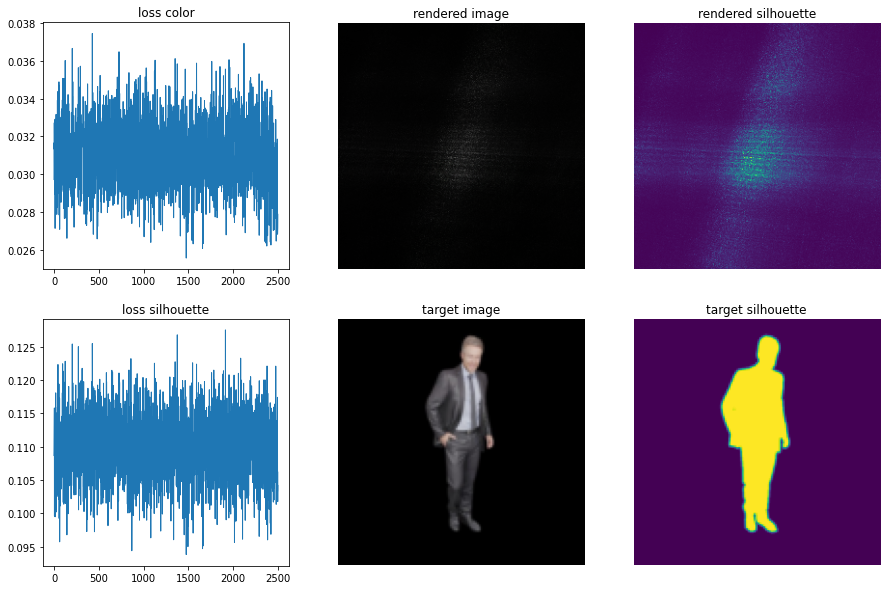

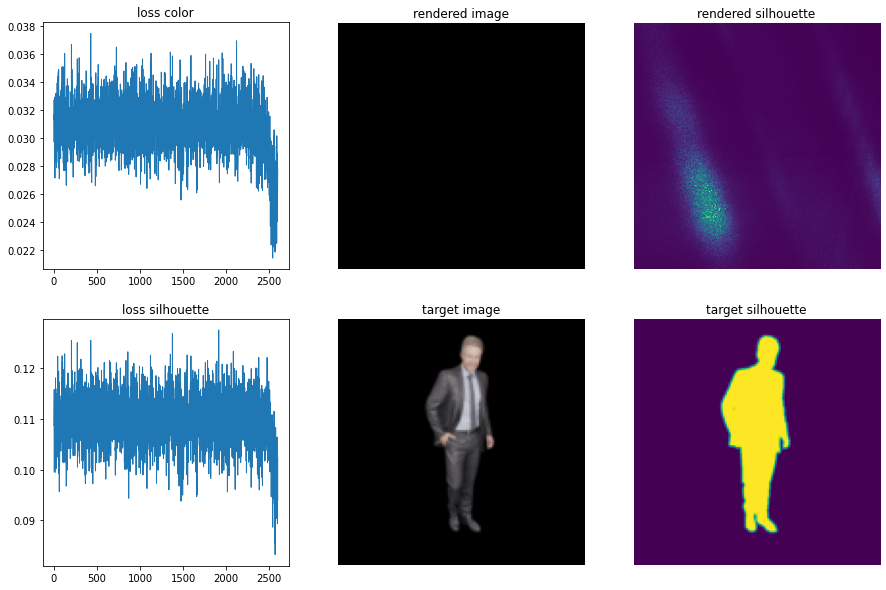

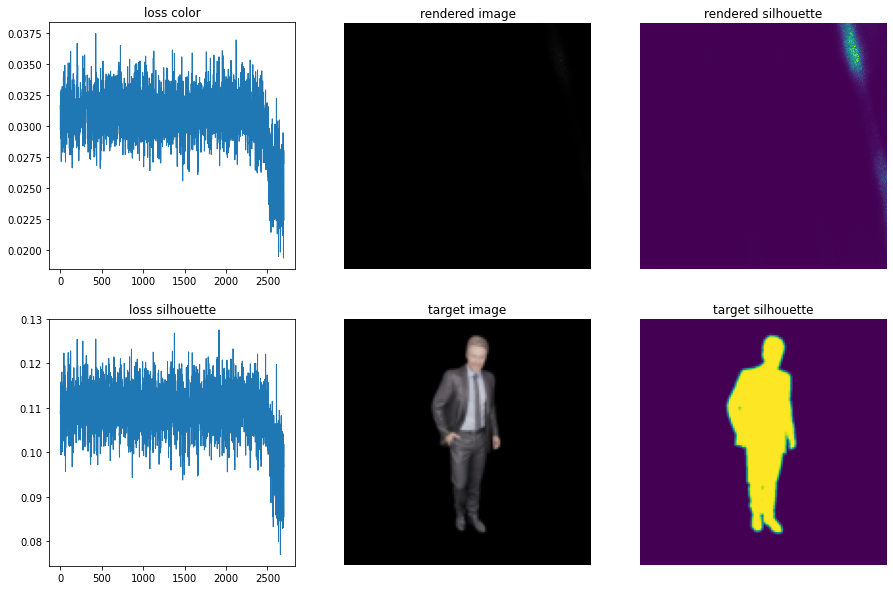

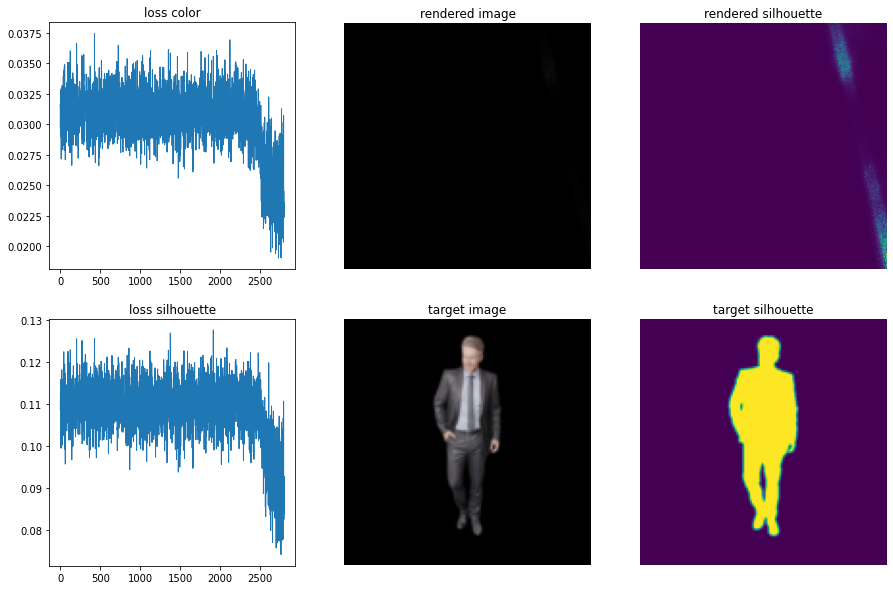

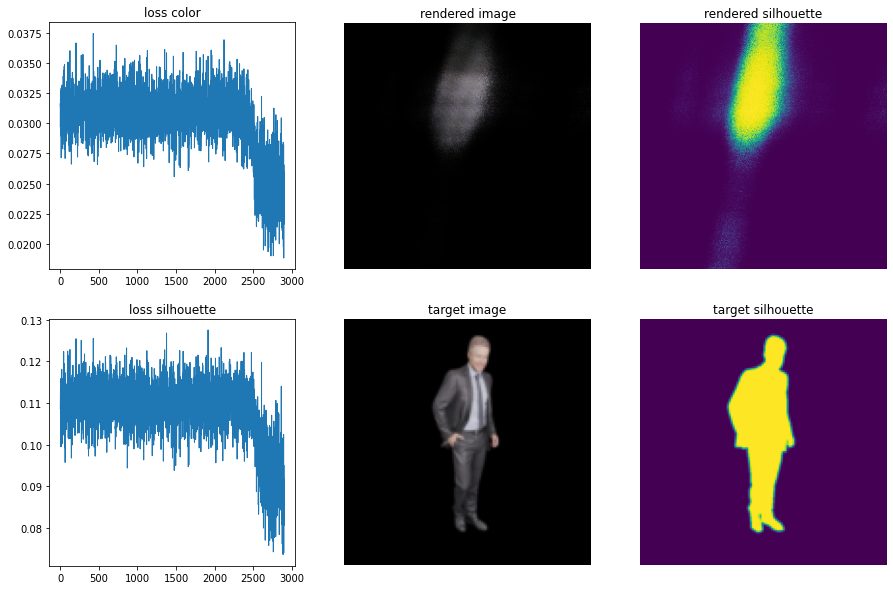

In [ ]:
# First move all relevant variables to the correct device.
renderer_grid = renderer_grid.to(device)
renderer_mc = renderer_mc.to(device)
target_cameras = target_cameras.to(device)
target_images = target_images.to(device)
target_silhouettes = target_silhouettes.to(device)

# Set the seed for reproducibility
torch.manual_seed(1)

# Instantiate the radiance field model.
neural_radiance_field = NeuralRadianceField().to(device)

# Instantiate the Adam optimizer. We set its master learning rate to 1e-3.
lr = 1e-3
optimizer = torch.optim.Adam(neural_radiance_field.parameters(), lr=lr)

# We sample 6 random cameras in a minibatch. Each camera
# emits raysampler_mc.n_pts_per_image rays.
batch_size = 6

# 3000 iterations take ~20 min on a Tesla M40 and lead to
# reasonably sharp results. However, for the best possible
# results, we recommend setting n_iter=20000.
n_iter = 3000

# Init the loss history buffers.
loss_history_color, loss_history_sil = [], []

# The main optimization loop.
for iteration in range(n_iter):      
    # In case we reached the last 75% of iterations,
    # decrease the learning rate of the optimizer 10-fold.
    if iteration == round(n_iter * 0.75):
        print('Decreasing LR 10-fold ...')
        optimizer = torch.optim.Adam(
            neural_radiance_field.parameters(), lr=lr * 0.1
        )
    
    # Zero the optimizer gradient.
    optimizer.zero_grad()
    
    # Sample random batch indices.
    batch_idx = torch.randperm(len(target_cameras))[:batch_size]
    
    # Sample the minibatch of cameras.
    batch_cameras = FoVPerspectiveCameras(
        R = target_cameras.R[batch_idx], 
        T = target_cameras.T[batch_idx], 
        znear = target_cameras.znear[batch_idx],
        zfar = target_cameras.zfar[batch_idx],
        aspect_ratio = target_cameras.aspect_ratio[batch_idx],
        fov = target_cameras.fov[batch_idx],
        device = device,
    )
    
    # Evaluate the nerf model.
    rendered_images_silhouettes, sampled_rays = renderer_mc(
        cameras=batch_cameras, 
        volumetric_function=neural_radiance_field
    )
    rendered_images, rendered_silhouettes = (
        rendered_images_silhouettes.split([3, 1], dim=-1)
    )
    
    # Compute the silhouette error as the mean huber
    # loss between the predicted masks and the
    # sampled target silhouettes.
    silhouettes_at_rays = sample_images_at_mc_locs(
        target_silhouettes[batch_idx, ..., None], 
        sampled_rays.xys
    )
    sil_err = huber(
        rendered_silhouettes, 
        silhouettes_at_rays,
    ).abs().mean()

    # Compute the color error as the mean huber
    # loss between the rendered colors and the
    # sampled target images.
    colors_at_rays = sample_images_at_mc_locs(
        target_images[batch_idx], 
        sampled_rays.xys
    )
    color_err = huber(
        rendered_images, 
        colors_at_rays,
    ).abs().mean()
    
    # The optimization loss is a simple
    # sum of the color and silhouette errors.
    loss = color_err + sil_err
    
    # Log the loss history.
    loss_history_color.append(float(color_err))
    loss_history_sil.append(float(sil_err))
    
    # Every 10 iterations, print the current values of the losses.
    if iteration % 10 == 0:
        print(
            f'Iteration {iteration:05d}:'
            + f' loss color = {float(color_err):1.2e}'
            + f' loss silhouette = {float(sil_err):1.2e}'
        )
    
    # Take the optimization step.
    loss.backward()
    optimizer.step()
    
    # Visualize the full renders every 100 iterations.
    if iteration % 100 == 0:
        show_idx = torch.randperm(len(target_cameras))[:1]
        show_full_render(
            neural_radiance_field,
            FoVPerspectiveCameras(
                R = target_cameras.R[show_idx], 
                T = target_cameras.T[show_idx], 
                znear = target_cameras.znear[show_idx],
                zfar = target_cameras.zfar[show_idx],
                aspect_ratio = target_cameras.aspect_ratio[show_idx],
                fov = target_cameras.fov[show_idx],
                device = device,
            ), 
            target_images[show_idx][0],
            target_silhouettes[show_idx][0],
            loss_history_color,
            loss_history_sil,
        )

Rendering rotating NeRF ...


  0%|          | 0/15 [00:00<?, ?it/s]

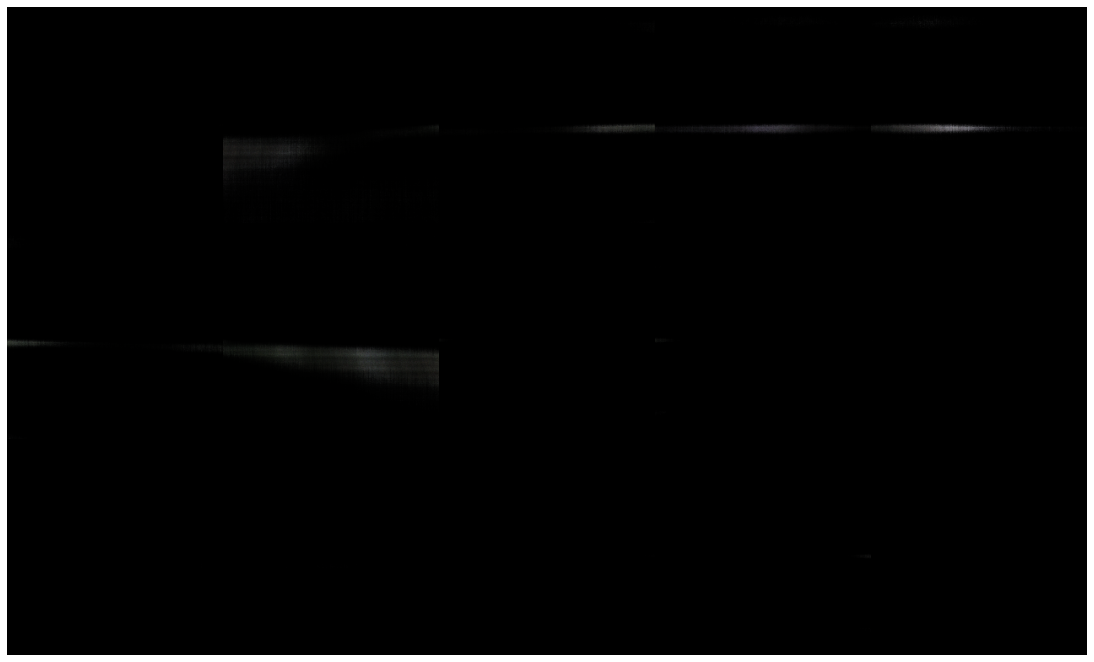

In [ ]:
def generate_rotating_nerf(neural_radiance_field, n_frames = 50):
    logRs = torch.zeros(n_frames, 3, device=device)
    logRs[:, 1] = torch.linspace(-3.14, 3.14, n_frames, device=device)
    Rs = so3_exp_map(logRs)
    Ts = torch.zeros(n_frames, 3, device=device)
    Ts[:, 2] = 2.7
    frames = []
    print('Rendering rotating NeRF ...')
    for R, T in zip(tqdm(Rs), Ts):
        camera = FoVPerspectiveCameras(
            R=R[None], 
            T=T[None], 
            znear=target_cameras.znear[0],
            zfar=target_cameras.zfar[0],
            aspect_ratio=target_cameras.aspect_ratio[0],
            fov=target_cameras.fov[0],
            device=device,
        )
        # Note that we again render with `NDCMultinomialRaysampler`
        # and the batched_forward function of neural_radiance_field.
        frames.append(
            renderer_grid(
                cameras=camera, 
                volumetric_function=neural_radiance_field.batched_forward,
            )[0][..., :3]
        )
    return torch.cat(frames)
    
with torch.no_grad():
    rotating_nerf_frames = generate_rotating_nerf(neural_radiance_field, n_frames=3*5)
    
image_grid(rotating_nerf_frames.clamp(0., 1.).cpu().numpy(), rows=3, cols=5, rgb=True, fill=True)
plt.show()